✅ Cell 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


✅ Cell 2: Load Dataset

In [2]:
# Load true and fake news data
true_df = pd.read_csv('../data/True.csv')
fake_df = pd.read_csv('../data/Fake.csv')


✅ Cell 3: Add Labels and Merge Data

In [3]:
# Label the data
true_df['label'] = 1  # Real news
fake_df['label'] = 0  # Fake news

# Combine and shuffle
df = pd.concat([true_df, fake_df])
df = df.sample(frac=1).reset_index(drop=True)


✅ Cell 4: Basic Exploration

In [4]:
# Display some basic info
print("Dataset shape:", df.shape)
print("\nSample data:")
df.head()


Dataset shape: (44898, 5)

Sample data:


,title,text,subject,date,label
0,Turkey is 'deeply concerned' about cases of it...,ANKARA (Reuters) - Turkey is deeply concerned...,worldnews,"November 6, 2017",1
1,Hyatt heir Pritzker opens Democratic bid to un...,CHICAGO (Reuters) - Billionaire investor J.B. ...,politicsNews,"April 6, 2017",1
2,TOMI LAHREN: “AFTER 8 YEARS…We were part of a ...,,politics,"Jan 26, 2017",0
3,Boiler Room EP #109 – It’s a Wonderfull Life,Tune in to the Alternate Current Radio Network...,Middle-east,"May 19, 2017",0
4,WATCH: Obama DRAGS Trump In Epic Fashion On T...,"President Obama let loose on Donald Trump, des...",News,"August 2, 2016",0


✅ Cell 5: Combine Text and Preprocess

In [5]:
# Combine title and content into one text field
df['text'] = df['title'] + " " + df['text']


✅ Cell 6: Clean Text Function

In [6]:
# Basic text cleaning
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    return text

df['text'] = df['text'].apply(clean_text)


✅ Cell 7: Split Data

In [7]:
# Define features and target
X = df['text']
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


✅ Cell 8: TF-IDF Vectorization

In [8]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


✅ Cell 9: Train Model

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'class_weight': ['balanced']
}

grid_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_model.fit(X_train_vec, y_train)

model = grid_model.best_estimator_

# Save the model
import pickle
with open("../models/fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)


✅ Cell 10: Predict and Evaluate

In [10]:
# Predict on test data
y_pred = model.predict(X_test_vec)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9947661469933184


✅ Cell 11: Confusion Matrix & Report

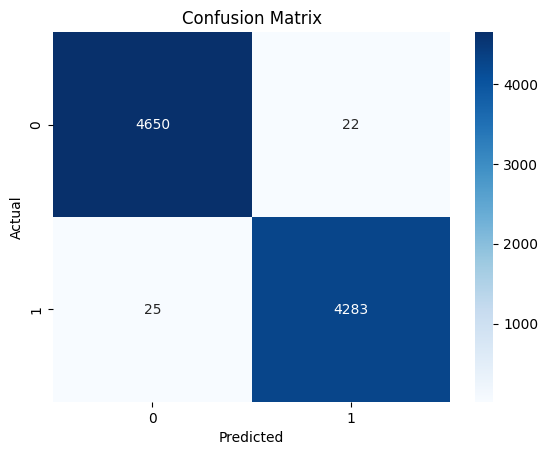

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4672
           1       0.99      0.99      0.99      4308

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


✅ Cell 12: Save Model and Vectorizer

In [12]:
import pickle

# Save the model
with open("../models/fake_news_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the vectorizer
with open("../models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
